#Analysis of New York State Arrest Data
By Michal Borek '26 MSU & Hannah Jeffery PhD Candidate MSU

In this data analysis, we created graphs that show discrepancies between New York State race demographics, arrest rates by age, and types of arrest.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import codecs
with codecs.open('OCA-STAT-Act.csv', 'r', encoding='utf-8',
                 errors='ignore') as fdata:
                 data = pd.read_csv(fdata, on_bad_lines='skip')

In [6]:
data.rename(columns={'Row #': 'People'}, inplace=True)
data.describe()

,People,Arraign Year,Arraign Month,Arrest Age,Fines Imposed,Fees Imposed,Surcharges Imposed
count,753543.000000,753543.000000,753543.000000,687002.000000,129281.000000,115048.000000,124723.000000
mean,376772.000000,2021.298059,6.277788,35.087205,333.904875,41.079925,163.828218
std,217529.271285,0.605875,3.328449,12.137005,738.053799,100.017114,103.581092
min,1.000000,2020.000000,1.000000,11.000000,1.000000,0.250000,1.000000
25%,188386.500000,2021.000000,4.000000,26.000000,100.000000,5.000000,88.000000
50%,376772.000000,2021.000000,6.000000,33.000000,200.000000,25.000000,120.000000
75%,565157.500000,2022.000000,9.000000,42.000000,500.000000,75.000000,200.000000
max,753543.000000,2022.000000,12.000000,110.000000,105000.000000,4450.000000,3000.000000


In [7]:
data.head()

,People,Court Type,Region,District,County,Court,Arresting Agency,Arrest Type,Arraign Year,Arraign Month,...,Race,Arrest Age,Docket Status,Disposition Type,Disposition Detail,Dismissal Reason,Most Severe Sentence,Fines Imposed,Fees Imposed,Surcharges Imposed
0,1,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT 014,DAT,2020,11,...,Unknown,31.0,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN
1,2,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,DAT,2020,11,...,White,34.0,Disposed,Dism-ACD,Adjourned - Cpl Section 170.55,ACD,,NaN,NaN,NaN
2,3,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,Unknown,DAT,2020,11,...,White,19.0,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN
3,4,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,DAT,2020,11,...,White,27.0,Disposed,Dismissed,Dismissed-Interest Of Justice,Dismissed-Interest Of Justice,,NaN,NaN,NaN
4,5,Local-NYC Criminal Court,NYC,District 1,New York,Midtown Community Court,NYCPD PCT MPCTS,NYC Summons,2020,11,...,Unknown,NaN,Disposed,Dismissed,Dismissed,Dismissed,,NaN,NaN,NaN


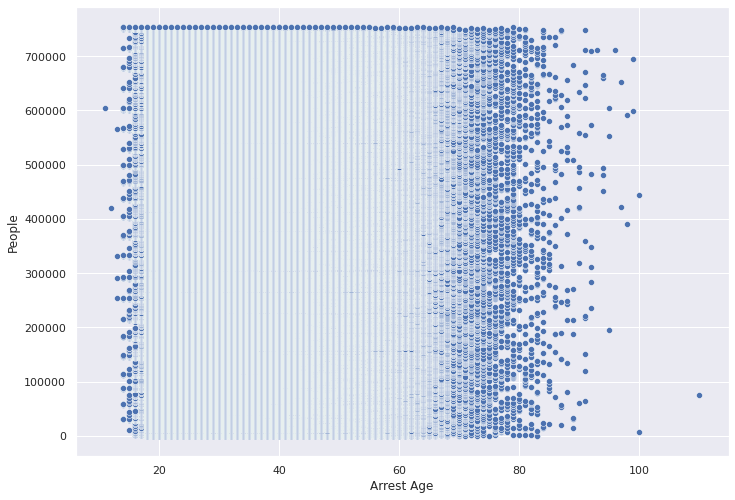

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(y=data['People'], x=data['Arrest Age'])

Amount of people of different races who meet a charges

In [10]:
data['Race'].value_counts()

White      286077
Black      269732
Unknown    182582
Asian       10855
Other        2967
Indian       1330
Name: Race, dtype: int64

In [12]:
data.columns

Index(['People', 'Court Type', 'Region', 'District', 'County', 'Court',
       'Arresting Agency', 'Arrest Type', 'Arraign Year', 'Arraign Month',
       'Top Charge at Arraignment', 'Severity', 'Weight', 'Law',
       'Article.Section', 'Attempt Flag', 'Gender', 'Ethnicity', 'Race',
       'Arrest Age', 'Docket Status', 'Disposition Type', 'Disposition Detail',
       'Dismissal Reason', 'Most Severe Sentence', 'Fines Imposed',
       'Fees Imposed', 'Surcharges Imposed'],
      dtype='object')

##10 the most charges at arraignment

In [33]:
data['Top Charge at Arraignment'] = data['Top Charge at Arraignment'].str.upper()
data['Top Charge at Arraignment'].value_counts().head(10)

PETIT LARCENY                     53889
ASLT 3-W/INT CAUSE PHYS INJURY    51740
OPER M/V IN VIOL SAFETY RULES     38663
AGGRAVATED UNLIC OPER VEH-3RD     31402
CRIM POSS CONTRL SUBST-7TH        30470
CRIM CONTEMPT-2ND:DISOBEY CRT     23080
OP MV WHILE INTOXICATED 1         20452
CPW-2ND: LOADED FIREARM           19914
CRIM MIS:INTENT DAMAGE PROPRTY    16965
MENACING-2ND:WEAPON               11579
Name: Top Charge at Arraignment, dtype: int64

In [31]:
data[data['Top Charge at Arraignment'].apply(lambda x: 'off' in x.lower())]['Top Charge at Arraignment'].value_counts().head(10)

DWI- 1ST OFFENSE                           8654
OPER MV BAC .08 OF 1% -1ST OFF             6343
AGGRAVATED FAMILY OFFENSE                  2262
AGG DWI:WITH CHILD-1ST OFFENSE             1556
ASLT-2-INT CAUS PH INJ TO OFF               863
SEX OFF FAIL REP CHANGE-PRIOR               676
FLEE OFFICER IN MOTOR VEH-3RD               535
UNLAW/FLEEING POLICE OFFICER                433
OFFENSIVE MATTER IN STREET/PUBLIC PLACE     328
ASLT:POLICE OFF/FIREMAN/EMT                 205
Name: Top Charge at Arraignment, dtype: int64

In [14]:
colu = ['PETIT LARCENY', 'ASLT 3-W/INT CAUSE PHYS INJURY',
'OPER M/V IN VIOL SAFETY RULES',
'AGGRAVATED UNLIC OPER VEH-3RD',
'CRIM POSS CONTRL SUBST-7TH',
'CRIM CONTEMPT-2ND:DISOBEY CRT',
'OP MV WHILE INTOXICATED 1',
'CPW-2ND: LOADED FIREARM',
'CRIM MIS:INTENT DAMAGE PROPRTY',
'MENACING-2ND:WEAPON']

In [15]:
data1 = data[data['Top Charge at Arraignment'].isin(colu)]

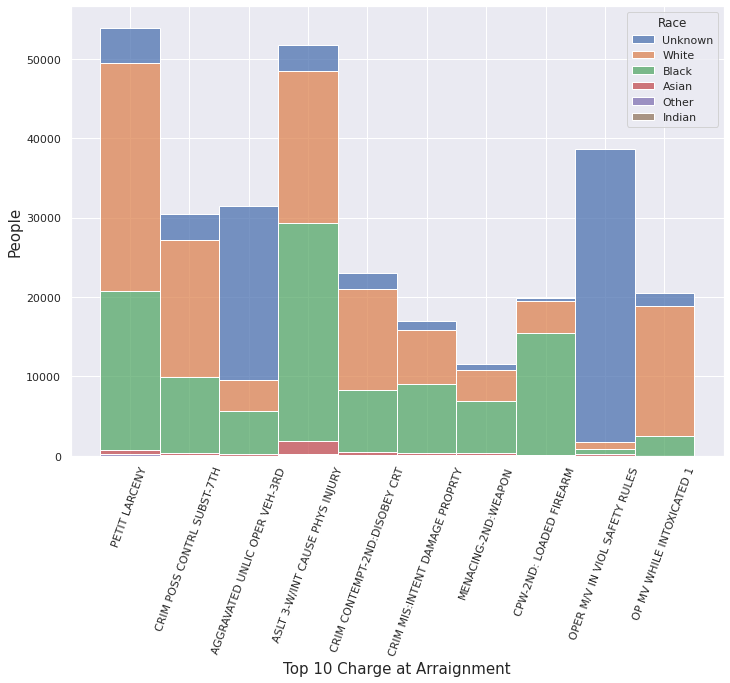

In [34]:
# Change the legend order in the scatter plot
sns.histplot(data1, x='Top Charge at Arraignment', hue ='Race', multiple='stack')

# Show plot
plt.xticks(rotation=70)
plt.ylabel('People', size=15)
plt.xlabel('Top 10 Charge at Arraignment', size=15)

plt.show()